In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [7]:
Data_dir = "/home/tural/Desktop/datas/data"
CATEGORY = ["with_mask","without_mask"]

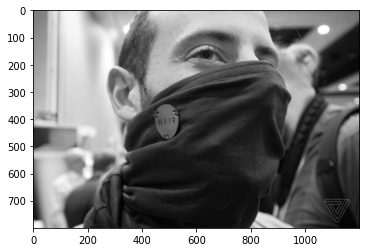

In [8]:
for category in CATEGORY:
    path = os.path.join(Data_dir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break
        

In [10]:
img_array.shape

(800, 1200)

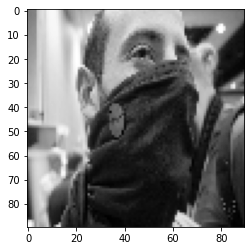

In [11]:
IMG_SIZE = 90

new_arry = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_arry,cmap='gray')
plt.show()

In [12]:
traing_data = []

def training():
    for category in CATEGORY:
        path = os.path.join(Data_dir,category)
        class_num = CATEGORY.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_arry = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                traing_data.append([new_arry,class_num])
            except Exception as e:
                pass
            
training()

In [13]:
print(len(traing_data))

7553


In [14]:
X = []
y = []

In [15]:
for feat , labels in traing_data:
    X.append(feat)
    y.append(labels)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [16]:
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
from sklearn.model_selection import train_test_split as tts

In [18]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [20]:
X_train.shape

(6042, 90, 90, 1)

In [21]:
import pandas as pd

In [22]:
y_train1 = pd.DataFrame(y_train)

In [23]:
y_test1 = pd.DataFrame(y_test)

In [24]:
y_train1.shape

(6042, 1)

In [25]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(90,90,1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [27]:
epochs=10
history = model.fit(X_train,y_train1,epochs=epochs)

Epoch 1/10
189/189 [==============================] - 33s 168ms/step - loss: 12.8266 - accuracy: 0.5964
Epoch 2/10
189/189 [==============================] - 30s 161ms/step - loss: 0.4373 - accuracy: 0.7937
Epoch 3/10
189/189 [==============================] - 31s 163ms/step - loss: 0.3237 - accuracy: 0.8567
Epoch 4/10
189/189 [==============================] - 30s 160ms/step - loss: 0.2546 - accuracy: 0.8906
Epoch 5/10
189/189 [==============================] - 30s 161ms/step - loss: 0.2112 - accuracy: 0.9092
Epoch 6/10
189/189 [==============================] - 31s 162ms/step - loss: 0.1536 - accuracy: 0.9365
Epoch 7/10
189/189 [==============================] - 31s 162ms/step - loss: 0.1231 - accuracy: 0.9532
Epoch 8/10
189/189 [==============================] - 30s 160ms/step - loss: 0.0992 - accuracy: 0.9639
Epoch 9/10
189/189 [==============================] - 30s 160ms/step - loss: 0.1060 - accuracy: 0.9626
Epoch 10/10
189/189 [==============================] - 31s 163ms/step - 

In [28]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

In [29]:
print("Classification Report: \n", classification_report(y_test1, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       737
           1       0.88      0.81      0.84       774

    accuracy                           0.84      1511
   macro avg       0.85      0.85      0.84      1511
weighted avg       0.85      0.84      0.84      1511



In [30]:
model.evaluate(X_test,y_test1)

48/48 [==============================] - 3s 44ms/step - loss: 0.5724 - accuracy: 0.8445


[0.5724157094955444, 0.8444738388061523]